# Project Python Foundations: FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. The aim is to perform data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Importing libraries for data manipulation
import numpy as np
import pandas as pd

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the Datasets
url=r"C:\DATA ANALYSIS\PYTHON\AILEADTECH PYTHON\Python Project\foodhub_order.csv"

### Understanding the structure of the data

In [3]:
# Read the data
df = pd.read_csv(url) 
# Returning the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Checking the shape of the dataset
df.shape 

(1898, 9)

### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [5]:
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [6]:
# Checking for missing values in the data
df.isnull().sum() 

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Summary statistics of the numerical data
df.describe() 

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [8]:
df_max=max(df["food_preparation_time"])
print(df_max)

35


In [9]:
df_min = min(df["food_preparation_time"])
print(df_min)

20


In [10]:
df_mean_value = df["food_preparation_time"].mean()
print(df_mean_value)

27.371970495258168


### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
df_not_rated=df[df["rating"] =='Not given'].value_counts() # Number of not rated order i.e Not given

In [12]:
df_not_rated.value_counts()

count
1    736
Name: count, dtype: int64

In [13]:
df['rating'].value_counts() # Rating details

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [14]:
# checking unique order ID
df['order_id'].nunique()

1898

#### Customer ID

In [15]:
# checking unique customer ID
df['customer_id'].nunique()  

1200

#### Restaurant name

In [16]:
# checking unique Restaurant Name
df['restaurant_name'].unique()  

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

In [17]:
## # checking the number of unique Restaurant Name
df['restaurant_name'].nunique() 

178

#### Cuisine type

In [18]:
# Checking unique cuisine type
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [19]:
# Checking number of unique cuisine type
df['cuisine_type'].nunique()

14

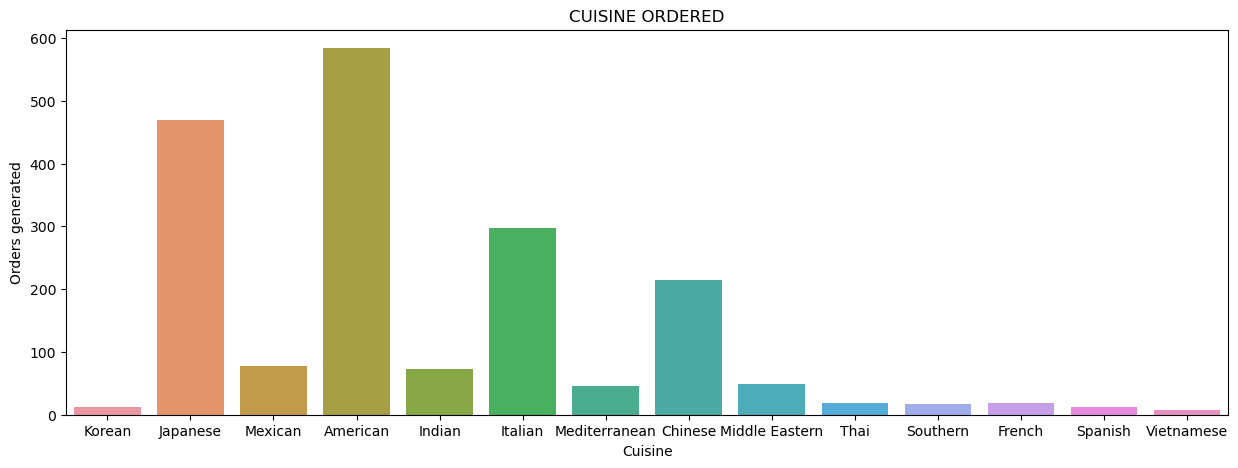

In [20]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')
plt.title('CUISINE ORDERED')
plt.xlabel('Cuisine')
plt.ylabel('Orders generated');

#### Cost of the order

C:\Users\ogund\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


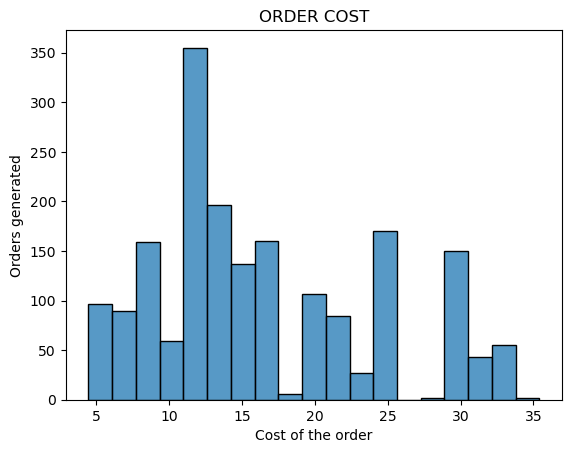

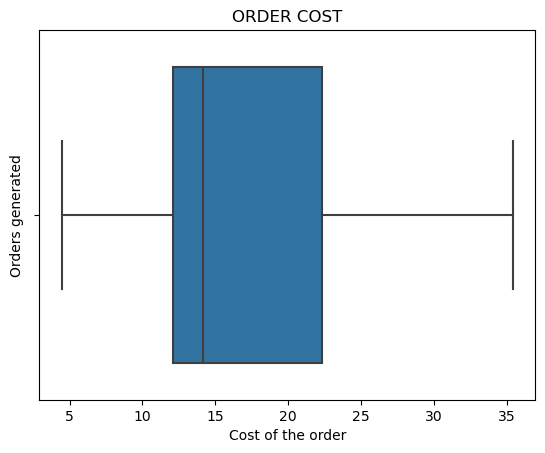

In [21]:
sns.histplot(data=df,x='cost_of_the_order') 
plt.title('ORDER COST')
plt.xlabel('Cost of the order')
plt.ylabel('Orders generated');
plt.show()
sns.boxplot(data=df,x='cost_of_the_order'); 
plt.title('ORDER COST')
plt.xlabel('Cost of the order')
plt.ylabel('Orders generated');
plt.show()

#### Day of the week

In [22]:
# # Checking the unique values
df['day_of_the_week'].unique() 

array(['Weekend', 'Weekday'], dtype=object)

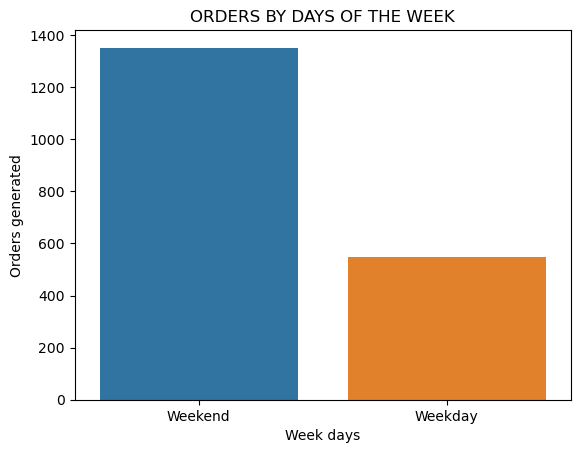

In [23]:
sns.countplot(data = df, x = 'day_of_the_week');
plt.title('ORDERS BY DAYS OF THE WEEK')
plt.xlabel('Week days')
plt.ylabel('Orders generated');

#### Rating

In [24]:
# Checking the unique values
df['rating'].unique() 

array(['Not given', '5', '3', '4'], dtype=object)

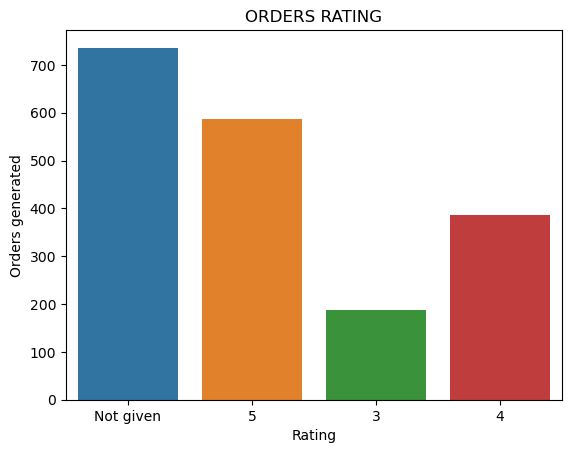

In [25]:
sns.countplot(data = df, x = 'rating') 
plt.title('ORDERS RATING')
plt.xlabel('Rating')
plt.ylabel('Orders generated');

#### Food Preparation time

C:\Users\ogund\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


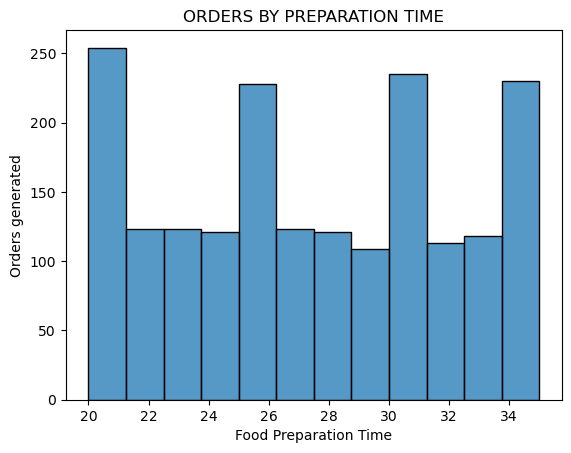

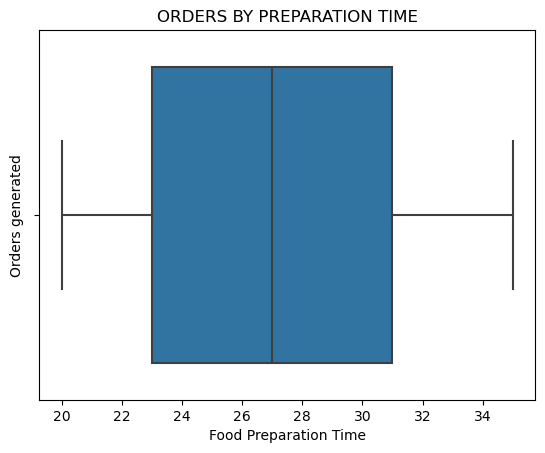

In [26]:
sns.histplot(data=df,x='food_preparation_time') 
plt.title('ORDERS BY PREPARATION TIME')
plt.xlabel('Food Preparation Time')
plt.ylabel('Orders generated');
plt.show()
sns.boxplot(data=df,x='food_preparation_time') 
plt.title('ORDERS BY PREPARATION TIME')
plt.xlabel('Food Preparation Time')
plt.ylabel('Orders generated');
plt.show()

#### Delivery time

C:\Users\ogund\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


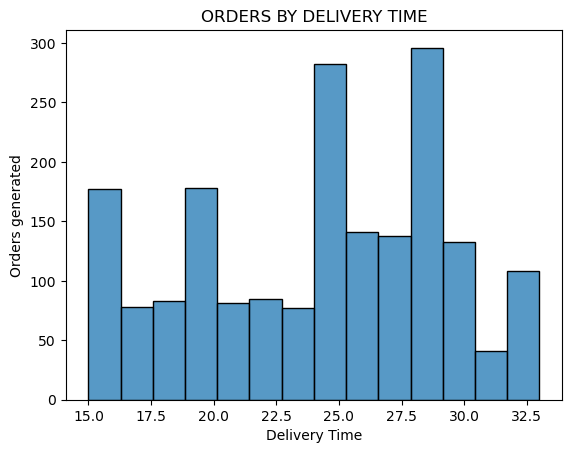

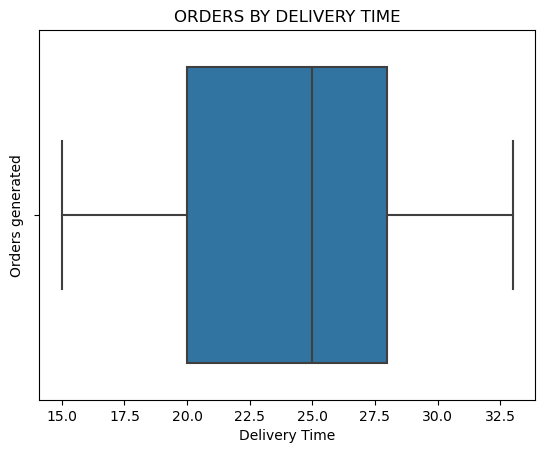

In [27]:
sns.histplot(data=df,x='delivery_time') 
plt.title('ORDERS BY DELIVERY TIME')
plt.xlabel('Delivery Time')
plt.ylabel('Orders generated');
plt.show()
sns.boxplot(data=df,x='delivery_time') 
plt.title('ORDERS BY DELIVERY TIME')
plt.xlabel('Delivery Time')
plt.ylabel('Orders generated');
plt.show()

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [28]:
# Getting top 5 restaurants with highest number of orders
dfR_count=df['restaurant_name'].value_counts() 

In [29]:
dfR_count.head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

In [30]:
# Getting most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].mode() 

0    American
Name: cuisine_type, dtype: object

### **Question 9:** What percentage of the orders cost more than 20 dollars? [2 marks]


In [31]:
# Getting orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20]  

# Calculating the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculating percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### **Question 10:** What is the mean order delivery time? [1 mark]

In [32]:
# Getting the mean delivery time
mean_del_time = df['delivery_time'].mean()  
print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [33]:
# Getting the counts of  each customer_id
df['customer_id'].value_counts().head(3)  

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### Cuisine vs Cost of the order

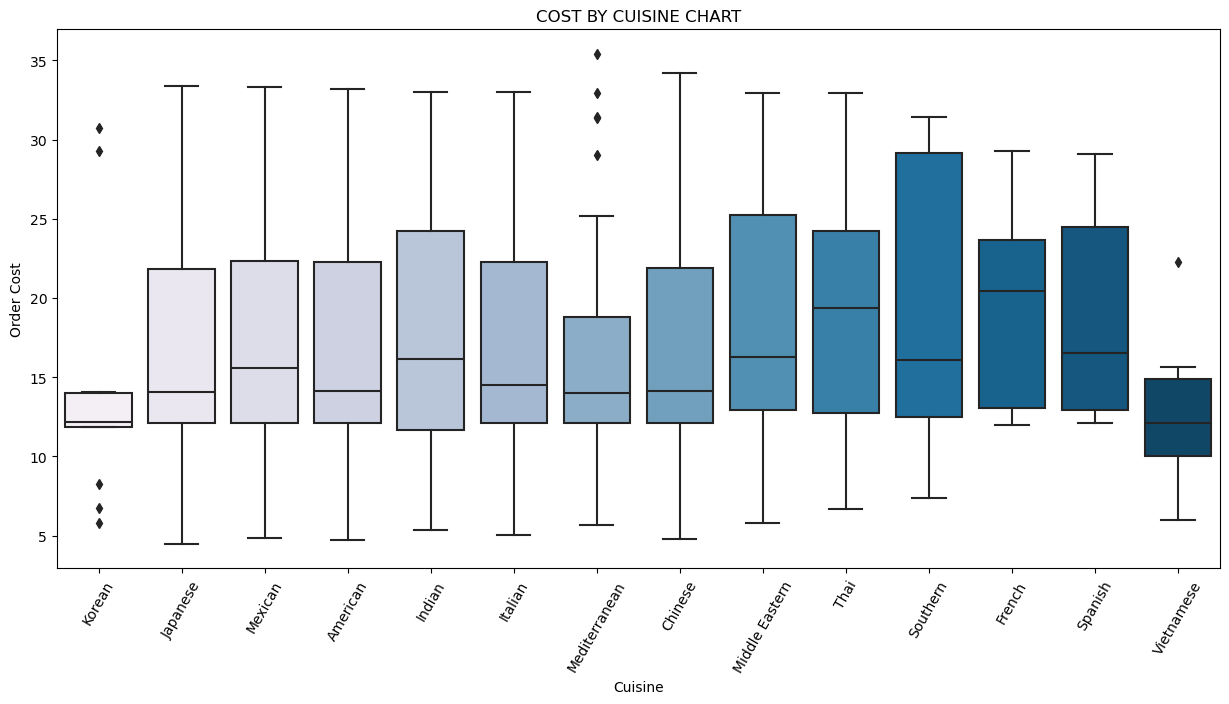

In [34]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.title('COST BY CUISINE CHART')
plt.xlabel('Cuisine')
plt.ylabel('Order Cost')
plt.show()

#### Cuisine vs Food Preparation time

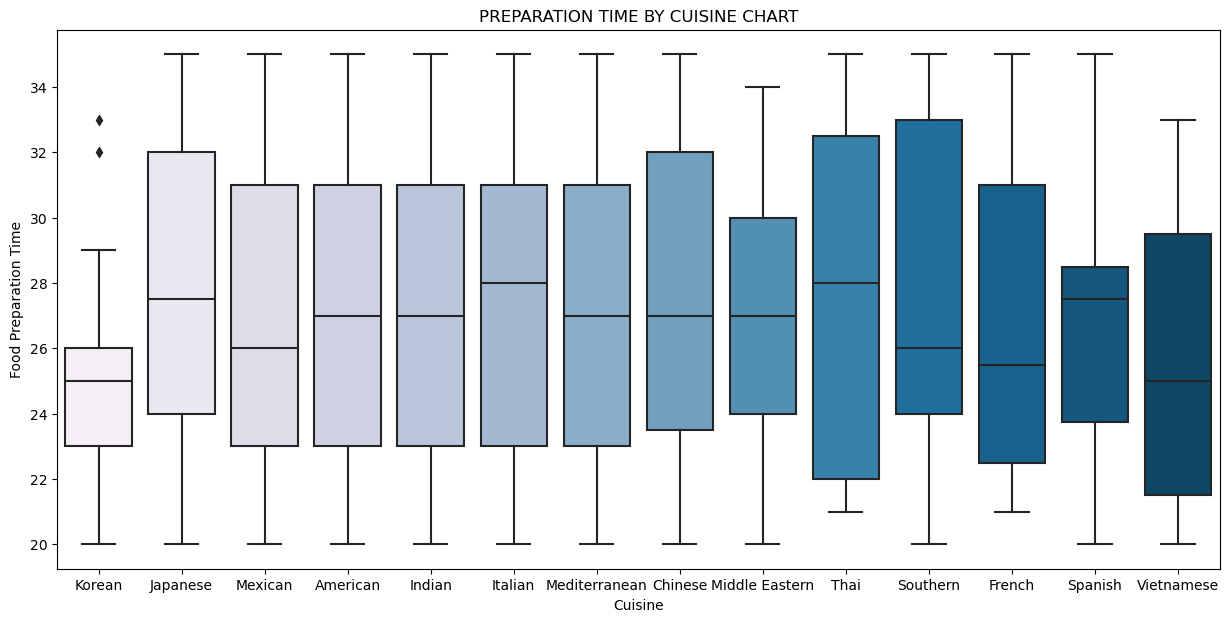

In [35]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')  
plt.title('PREPARATION TIME BY CUISINE CHART')
plt.xlabel('Cuisine')
plt.ylabel('Food Preparation Time')
plt.show()

#### Day of the Week vs Delivery time

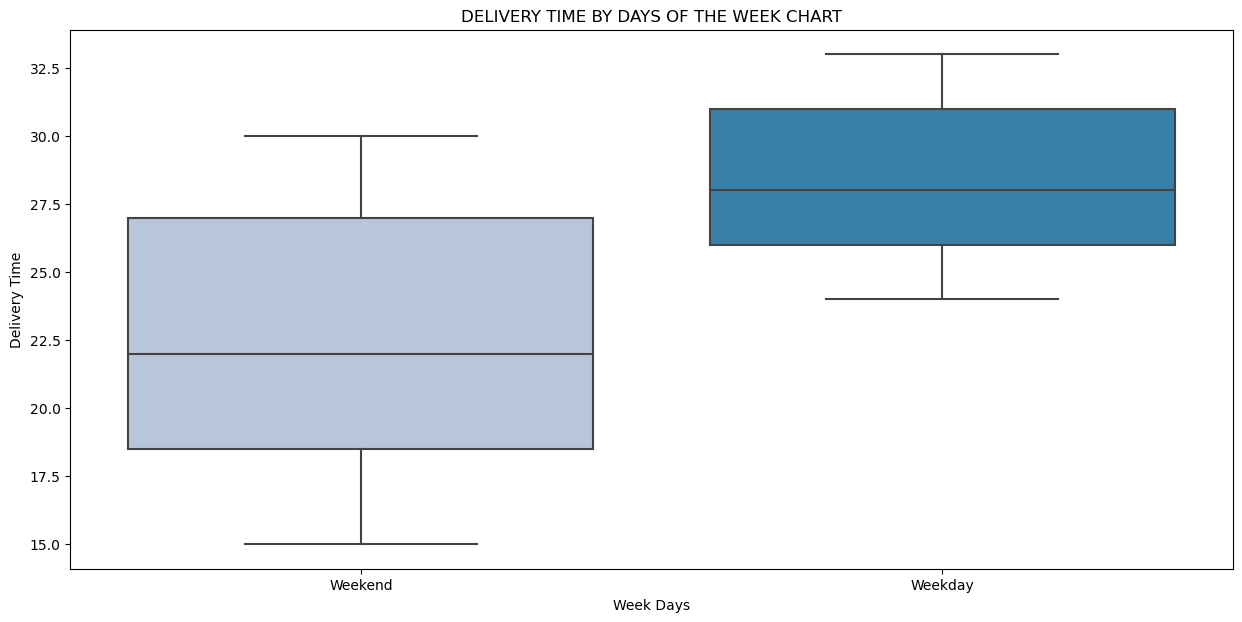

In [36]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')  
plt.title('DELIVERY TIME BY DAYS OF THE WEEK CHART')
plt.xlabel('Week Days')
plt.ylabel('Delivery Time')
plt.show()

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [37]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

### OBSERVATION ON REVENUE GENERATED BY THE RESTAURANTS

H

#### Rating vs Delivery time

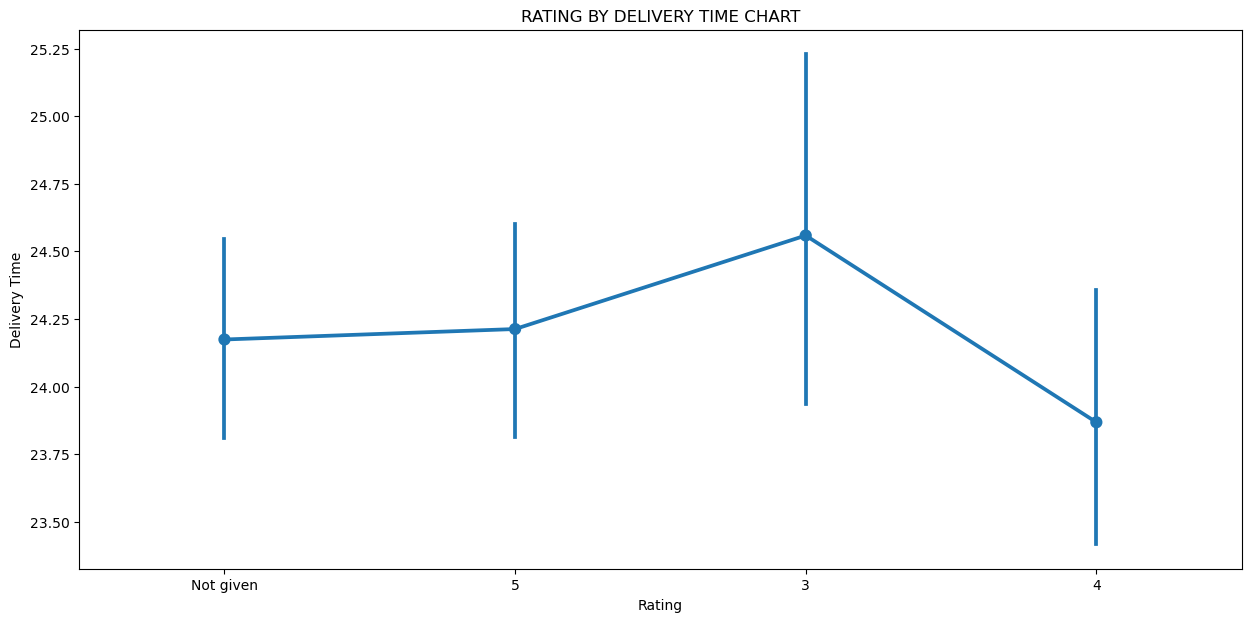

In [38]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.title('RATING BY DELIVERY TIME CHART')
plt.xlabel('Rating')
plt.ylabel('Delivery Time')
plt.show()

#### Rating vs Food preparation time

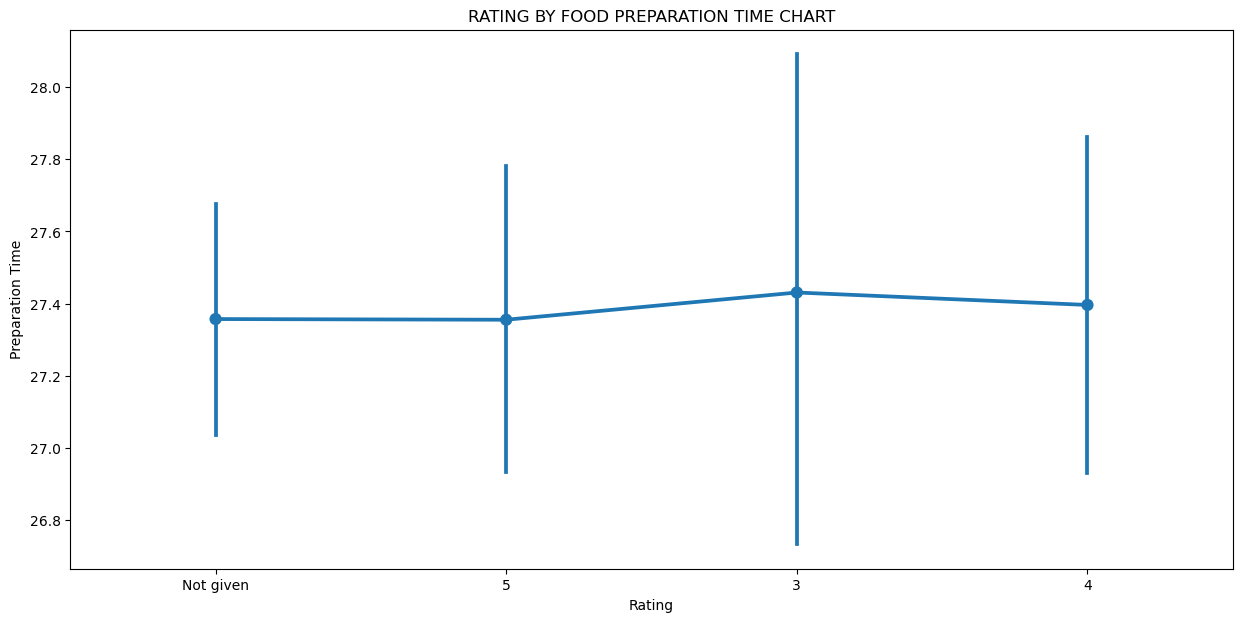

In [39]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)  
plt.title('RATING BY FOOD PREPARATION TIME CHART')
plt.xlabel('Rating')
plt.ylabel('Preparation Time')
plt.show()

#### Rating vs Cost of the order

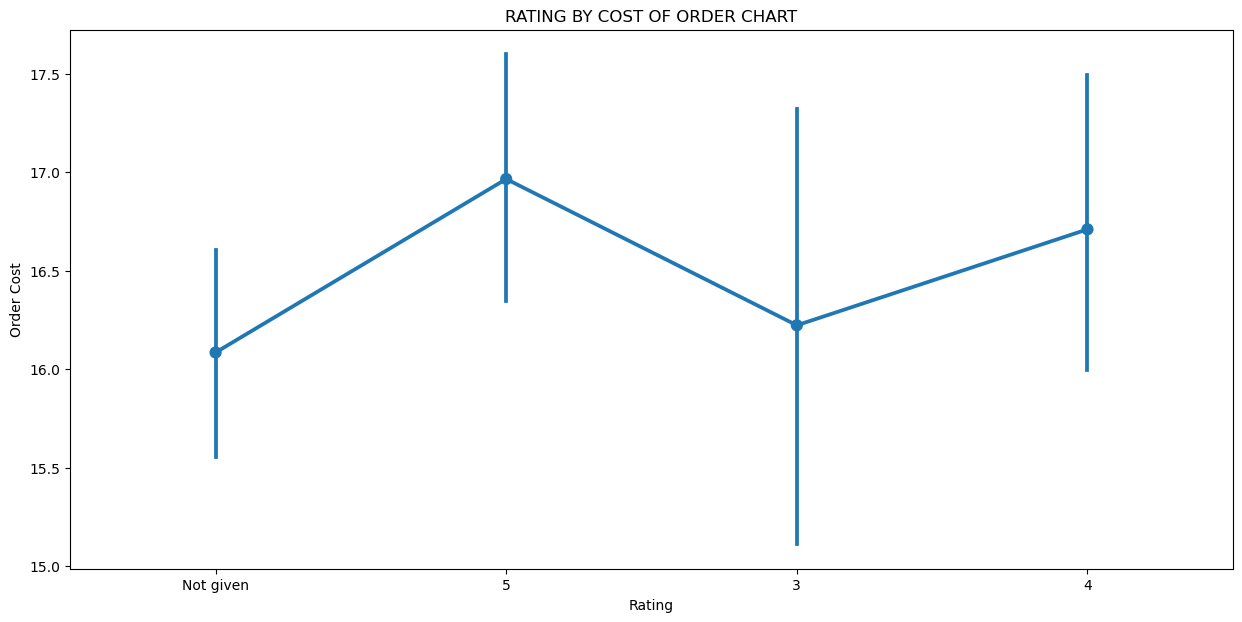

In [40]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)   
plt.title('RATING BY COST OF ORDER CHART')
plt.xlabel('Rating')
plt.ylabel('Order Cost')
plt.show()

#### Correlation among variables

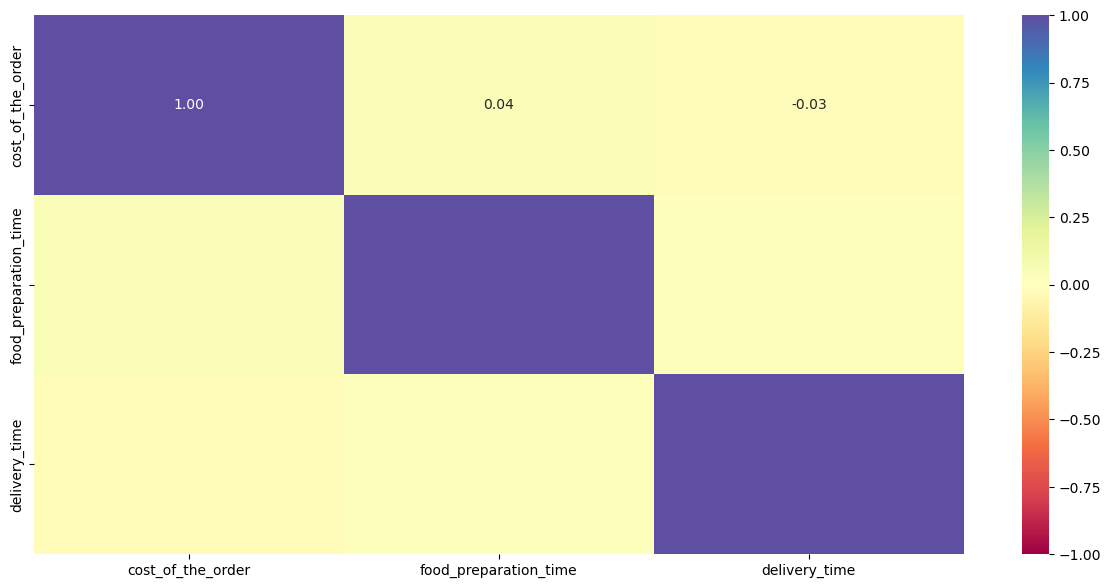

In [41]:
# Plotting heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [42]:
# Filtering the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Converting rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Creating a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [43]:
rest_names = df_rating_count['restaurant_name']

In [44]:
# Restaurant names that have rating count more than 50
rest_names = df_rating_count['restaurant_name'] 

# Filtering to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Grouping the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()


,restaurant_name,rating
0,'wichcraft,5.0
1,Ravagh Persian Grill,5.0
2,Chola Eclectic Indian Cuisine,5.0
3,Chote Nawab,5.0
4,Junoon,5.0
...,...,...
151,Woorijip,3.0
152,Byblos Restaurant,3.0
153,Pepe Giallo,3.0
154,Sushi Choshi,3.0


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [45]:

def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) 
df['Revenue'].head(5)

0    7.6875
1    1.8120
2    1.8345
3    7.3000
4    1.7385
Name: Revenue, dtype: float64

In [46]:
# The total revenue 
total_rev = df['Revenue'].sum() 
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)[2 marks]


In [47]:
# To calculate total delivery time 
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


## To find the percentage of orders that have more than 60 minutes of total delivery time 

total_time_greater_than_60 = df[df['total_time']>60]
percentage = (total_time_greater_than_60.shape[0] / df.shape[0]) * 100
print("Percentage of orders delivery time above 60 minutes:", round(percentage, 2), '%')

Percentage of orders delivery time above 60 minutes: 10.54 %


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [48]:
# mean delivery time on weekdays 
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## mean delivery time on weekends

print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')




The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekdays is around 22 minutes


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

- This is an exploratory data analysis of Foodhub data. From the analysis a total of 1898 orders were generated from 1200 customers which are serviced by 178 restuarants. Foodhub made a total revenue of $6166.3.


- From the 14 Cuisine, American cuisine is thew most preferred generating total ordfer of 584 follow by Japanese cuisine with total order  of 470 while Vietnamese cuisine is the list preferred by customer with a total order of 7. The average delivery time and the average food production time is 24.2 minutes and 27.4 minutes respectively. The average cost of each order is $16.5

### Recommendations:


- The deleivery system for Foodhub should be standardize to ensure orders are delivered within 24-25 minutes.
- FoodHub in conjunction with the Top five restaurants should run a weekend discount promo to increased awareness and customer loyalty.
- The restaurants should be encouraged to increase focus on the preparation of American, Japanese, Italian and Chinese Cuisine to boost customer patronage.
- The feedback provided by the customers in the rating section should be worked upon to give them a better experience while impact of this would be to move the customers up along the customer journey (i.e 4 ratings should be converted to 5 ratings and 3 ratings should be coverted to 4 ratings at the minimum).
- Considering the volume of orders generated on weekends, efforts should be made to ensure enough delivery personnels are on ground as well as backend staffs to promptly attend to queries and complaints.

---